# Quantified Self
By: Gavin McClure-Coleman & Sam Allen

## Introduction

For our project, we have decided to explore our Steam account data. Steam is a a digital distribution platform developed by Valve, primarily used for buying, downloading, and playing PC video games.

Using the Steam Web API through https://steamcommunity.com/dev and more specifically https://developer.valvesoftware.com/wiki/Steam_Web_API we are able to obtain all kinds of interesting stats like the games we own, have played the most, genres of those games, and much more.

We then decided to pull information about those games from the Steam Store API to compare our own data to some of the public information.

## 1) Get the personal steam account data

First, we need to make some API requests to get our data, we will be cleaning as we obtain this data to prep for our later exploratory data analysis.

To start, we will make a request to get all games owned on Gavin's Steam account and Sam's Steam account, and then merge the data

We can then set up the data by sorting by playtime, setting the index to game name, filling NaNs and a couple other techniques outlined in the comments of the code below

In [1]:
import utils
import pandas as pd

api_key = "D1E3D07E8AF97E4729A368F71FFB43F8"
sam_api_key = "BA9616D65081245B52940CEE86D4DECE"
steam_id = "76561198111062824"
sam_steam_id = "76561198198119993"

sam_games_df = utils.get_user_games(sam_api_key, sam_steam_id, "Sam")
gavin_games_df = utils.get_user_games(api_key, steam_id, "Gavin")

df = utils.merge_players(sam_games_df, gavin_games_df)

df.head()


,appid,playtime_forever_Sam,img_icon_url_Sam,has_community_visible_stats_Sam,playtime_windows_forever_Sam,playtime_mac_forever_Sam,playtime_linux_forever_Sam,playtime_deck_forever_Sam,rtime_last_played_Sam,content_descriptorids_Sam,...,has_community_visible_stats_Gavin,playtime_windows_forever_Gavin,playtime_mac_forever_Gavin,playtime_linux_forever_Gavin,playtime_deck_forever_Gavin,rtime_last_played_Gavin,content_descriptorids_Gavin,playtime_disconnected_Gavin,has_leaderboards_Gavin,playtime_2weeks_Gavin
Game,,,,,,,,,,,,,,,,,,,,,
Rust,252490,56285.0,820be4782639f9c4b64fa3ca7e6c26a95ae4fd1c,True,56285.0,0.0,0.0,0.0,1.729369e+09,"[1, 2, 5]",...,True,64159.0,0.0,0.0,0.0,1.736583e+09,"[1, 2, 5]",0.0,NaN,0.0
Destiny 2,1085660,6822.0,fce050d63f0a2f8eb51b603c7f30bfca2a301549,True,6822.0,0.0,0.0,0.0,1.728678e+09,NaN,...,True,148733.0,0.0,0.0,0.0,1.745380e+09,NaN,0.0,NaN,453.0
Terraria,105600,57014.0,858961e95fbf869f136e1770d586e0caefd4cfac,True,51545.0,0.0,0.0,0.0,1.739931e+09,NaN,...,True,16965.0,0.0,0.0,0.0,1.745117e+09,NaN,0.0,NaN,5.0
Counter-Strike 2,730,4632.0,8dbc71957312bbd3baea65848b545be9eae2a355,True,1163.0,0.0,0.0,0.0,1.730015e+09,"[2, 5]",...,True,10.0,0.0,0.0,0.0,1.644630e+09,"[2, 5]",0.0,NaN,0.0
Tom Clancy's Rainbow Six Siege,359550,58551.0,624745d333ac54aedb1ee911013e2edb7722550e,NaN,29019.0,0.0,0.0,0.0,1.712614e+09,NaN,...,NaN,6793.0,0.0,0.0,0.0,1.744437e+09,NaN,0.0,NaN,46.0


## 2) Data Cleaning
From the first 5 instances of our first dataset, we can see a couple of columns that aren't important to keep.  
Specifically, we will be getting rid of the following columns:
 * img_icon_url
 * has_community_visible_stats
 * playtime_windows_forever
 * playtime_mac_forever
 * playtime_linux_forever
 * playtime_deck_forever
 * content_descriptorids (describes the maturity ratings of the game)
 * playtime_disconnected
 * has_leaderboards

For clarity, the column rtime_last_played represents the **Unix timestamp** of the last time the game was played. In other words, it is the number of seconds since January 1, 1970 (the Unix epoch)
 * To convert from unix to a more readable format, we can use the `datetime.fromtimestamp(timestamp)` using the `from datetime import datetime` library.


In [2]:
df = utils.drop_columns(df, "Sam")
df = utils.drop_columns(df, "Gavin")
df.shape

(485, 7)

In [3]:
df.head()

,appid,playtime_forever_Sam,rtime_last_played_Sam,playtime_2weeks_Sam,playtime_forever_Gavin,rtime_last_played_Gavin,playtime_2weeks_Gavin
Game,,,,,,,
Rust,252490,56285.0,1.729369e+09,0.0,230031.0,1.736583e+09,0.0
Destiny 2,1085660,6822.0,1.728678e+09,0.0,148802.0,1.745380e+09,453.0
Terraria,105600,57014.0,1.739931e+09,0.0,73027.0,1.745117e+09,5.0
Counter-Strike 2,730,4632.0,1.730015e+09,0.0,42660.0,1.644630e+09,0.0
Tom Clancy's Rainbow Six Siege,359550,58551.0,1.712614e+09,0.0,39962.0,1.744437e+09,46.0


### Further data gathering and cleaning

We now have the personal game data from both of our Steam accounts, but we thought it wasn't enough to tell an interesting story about the data as a whole. Thus, we opted for gathering data from the steam store API itself to compare things like game prices, public reviews and sentiment, genres, etc.

This can be seen in the code below:

In [4]:
import requests

# For testing, we look at only first 5 instances
df = df.head(5)
utils.merge_game_data(df)

# Display the result
df.head()

,appid,playtime_forever_Sam,rtime_last_played_Sam,playtime_2weeks_Sam,playtime_forever_Gavin,rtime_last_played_Gavin,playtime_2weeks_Gavin,Genre,Price (USD $),Review Score,Total Positive Reviews,Total Negative Reviews
Game,,,,,,,,,,,,
Rust,252490,56285.0,1.729369e+09,0.0,230031.0,1.736583e+09,0.0,"Action, Adventure, Indie, Massively Multiplaye...",39.99,Very Positive,883940,124272
Destiny 2,1085660,6822.0,1.728678e+09,0.0,148802.0,1.745380e+09,453.0,"Action, Adventure, Free To Play",0.00,Mostly Positive,100178,27450
Terraria,105600,57014.0,1.739931e+09,0.0,73027.0,1.745117e+09,5.0,"Action, Adventure, Indie, RPG",9.99,Overwhelmingly Positive,1087249,26210
Counter-Strike 2,730,4632.0,1.730015e+09,0.0,42660.0,1.644630e+09,0.0,"Action, Free To Play",0.00,Very Positive,3859864,614346
Tom Clancy's Rainbow Six Siege,359550,58551.0,1.712614e+09,0.0,39962.0,1.744437e+09,46.0,Action,7.99,Very Positive,997147,183843


## 1) Exploratory Data Analysis

Now for the fun part! What does all of this data mean? Well for starters lets use some nice functions like `df.shape` and `df.dtypes` to gather some general stats and a better understanding of the dataset we are working with

In [5]:
df.shape

(5, 12)

In [6]:
df.dtypes

appid                        int64
playtime_forever_Sam       float64
rtime_last_played_Sam      float64
playtime_2weeks_Sam        float64
playtime_forever_Gavin     float64
rtime_last_played_Gavin    float64
playtime_2weeks_Gavin      float64
Genre                       object
Price (USD $)              float64
Review Score                object
Total Positive Reviews       int64
Total Negative Reviews       int64
dtype: object

Great! These will be useful to keep in mid as we go into some more interesting data analysis. Now lets begin with some data visualization. **KEEP IN MIND WE ARE ONLY LOOKING AT THE FIRST 5 GAME ENTRIES RIGHT NOW WHEN WE DO MACHINE LEARNING LATER WE WILL EXPAND TO OUR FULL DATA SET**

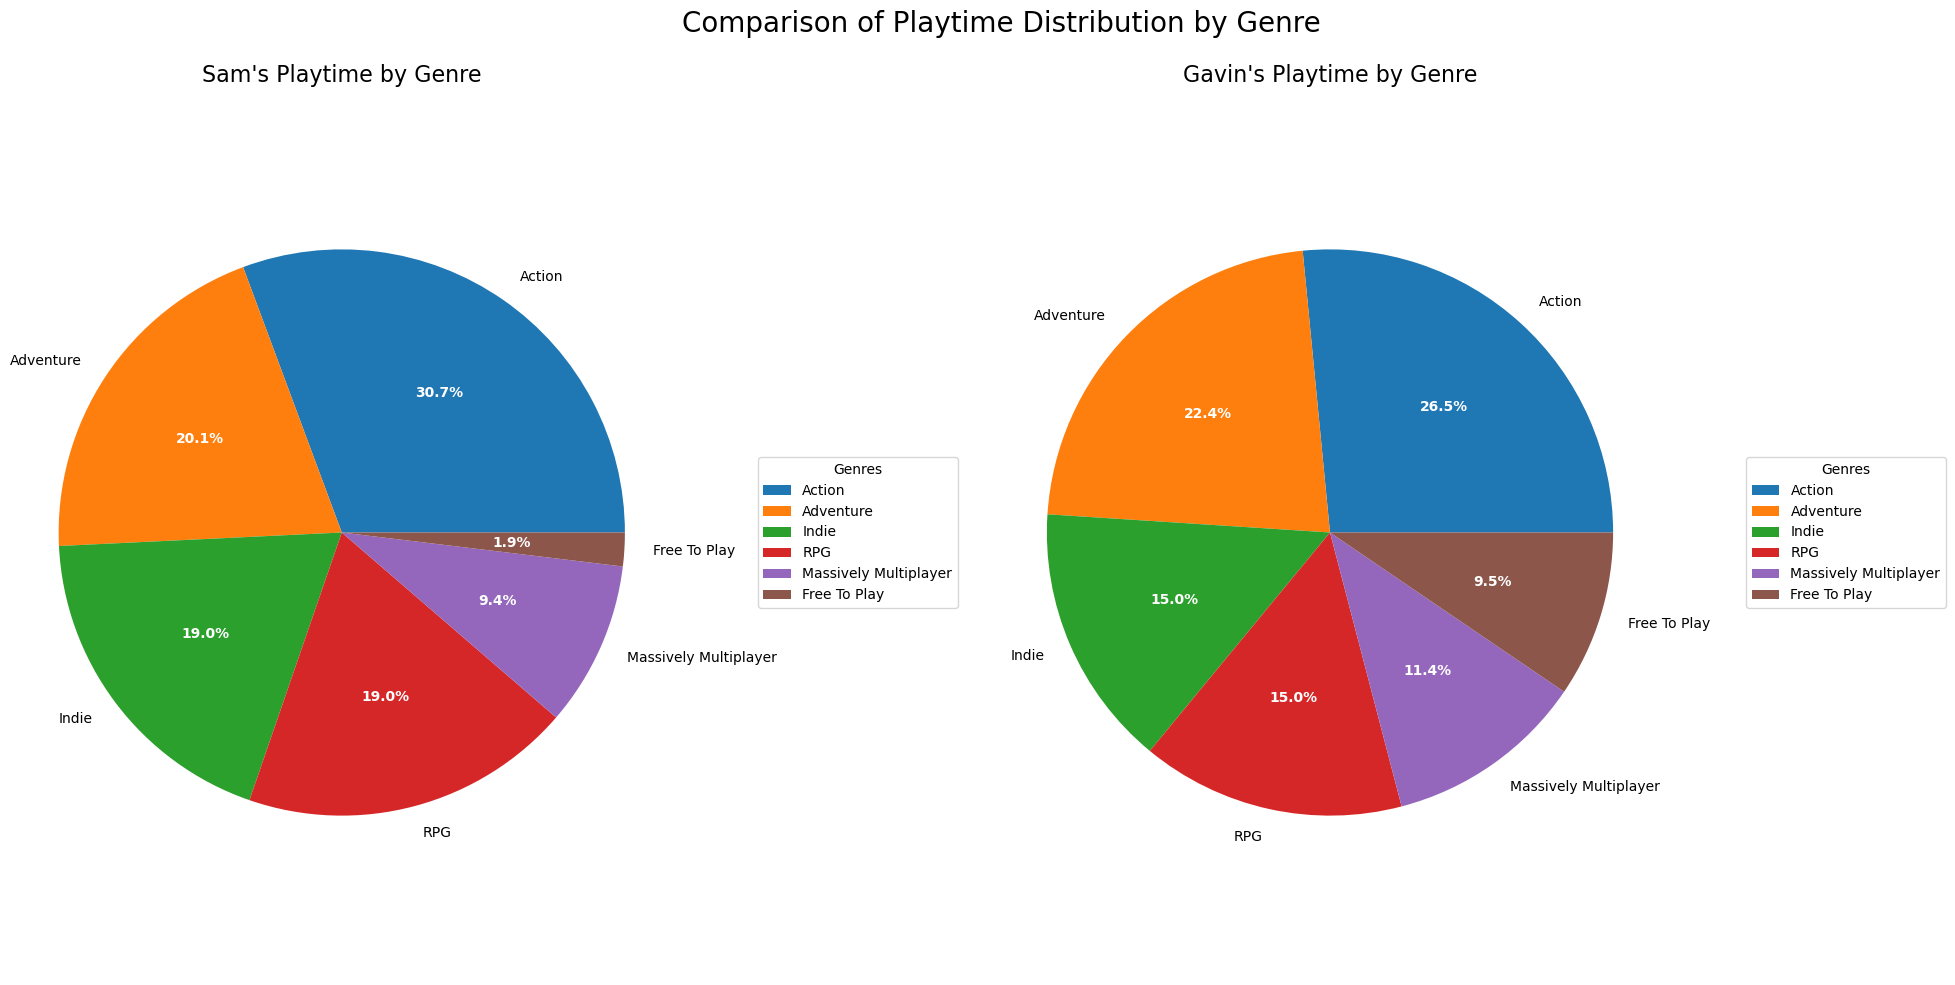

In [7]:
import matplotlib.pyplot as plt


def create_genre_summary(df, playtime_column):
    """
    Function to create a genre playtime summary for a specific user
    
    Usefal Source for pie chart: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
    
    """
    # First we can make a new dataframe that copies just the information we need this way we dont affect the original df
    genre_df = df[['Genre', playtime_column]].copy()
    
    # Filter out rows with missing genres
    genre_df = genre_df.dropna(subset=['Genre'])
    
    # Split the comma-separated genres and explode into separate rows, this helps solve issues caused by the fact that games have multiple genres seperated by commas and not just one
    genre_df['Genre'] = genre_df['Genre'].str.split(', ')
    genre_df = genre_df.explode('Genre')
    
    # Group by genre, sum playtime and then sort in descending order
    genre_playtime = genre_df.groupby('Genre')[playtime_column].sum().reset_index() # for reusability
    
    genre_playtime = genre_playtime.sort_values(playtime_column, ascending=False)
    
    # Take top 8 genres for better visualization
    top_genres = genre_playtime.head(8)
    if len(genre_playtime) > 8:
        other_playtime = genre_playtime.iloc[8:][playtime_column].sum()
    else:
        other_playtime = 0
    
    # Add an "Other" category for the rest because we want to keep the pie chart from being too cluttered
    if other_playtime > 0:
        top_genres = pd.concat([top_genres, pd.DataFrame({'Genre': ['Other'], playtime_column: [other_playtime]})], ignore_index=True)
    
    return top_genres

sam_genres = create_genre_summary(df, 'playtime_forever_Sam')
gavin_genres = create_genre_summary(df, 'playtime_forever_Gavin')

# Now we can create a figure with two subplots side by side, these will be both the graphs of our games
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Sam's pie chart
sam_wedges, sam_texts, sam_autotexts = ax1.pie(sam_genres['playtime_forever_Sam'], labels=sam_genres['Genre'], autopct='%1.1f%%')
ax1.set_title("Sam's Playtime by Genre", fontsize=16)
ax1.axis('equal')  # Equal aspect ratio

# Gavin's pie chart
gavin_wedges, gavin_texts, gavin_autotexts = ax2.pie(gavin_genres['playtime_forever_Gavin'], labels=gavin_genres['Genre'], autopct='%1.1f%%')
ax2.set_title("Gavin's Playtime by Genre", fontsize=16)
ax2.axis('equal')  # Equal aspect ratio

# Improve text visibility
for autotext in sam_autotexts + gavin_autotexts:
    autotext.set_fontsize(10)
    autotext.set_weight('bold')
    autotext.set_color('white')

# Add legend for each chart
ax1.legend(sam_genres['Genre'], title="Genres", loc="right", bbox_to_anchor=(1, 0, 0.5, 1))

ax2.legend(gavin_genres['Genre'], title="Genres", loc="right", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a main title for the entire figure (encompasses both of the pie charts)
fig.suptitle('Comparison of Playtime Distribution by Genre', fontsize=20)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make room for the suptitle

# Show the charts
plt.show()


### Pie Charts Explained

These graphs help us better understand how are playtimes across different genres are distributed, based on just some of our most played games we can see that Sam has more of his time spent then Gavin in some of the larger genre groupse like Action, Indie, and Adventure whereas Gavin has more of his time spent then sam in some of the smaller groups like Massively Multiplayer, Free To Play, and Other

This data is interesting but its not quite interesting enought to be the data we want to try and predict in our machine learning portion later.

So, we will move on to the next graph, comparing price to playtime:

### Hypothesis Testing
We are interested in whether the mean amount of playtime in minutes is different from each other. To test this, we will perform a 2-tailed, two sample test using the t-test method since the population standard deviation is unknown.

#### Step 1: Form our hypothesis  
$H_0: \mu_{sam} = \mu_{Gavin}$  
$H_1: \mu_{sam} \neq \mu_{Gavin}$  

#### Step 2: Select significance level  
$\alpha = 0.05$  

#### Step 3: Select test statistic  
$$t = \frac{\overline{x_1}-\overline{x_2}}{\sqrt{{{s_p}^2}}{(\frac{1}{n_1}+\frac{1}{n_2})}}$$  
where:
$${s_p}^2 = \frac{{(n_1-1)}{s_1}^2+{(n_2-1)}{s_2}^2}{n_1+n_2-2}$$

#### Step 4: Calculate test statistic

In [18]:
import scipy.stats as stats

t, pval = stats.ttest_ind(df["playtime_forever_Sam"], df["playtime_forever_Gavin"])
print(t, pval)

-1.8175203909138762 0.10665617111611722


#### Step 5: Interpret Results
Our results tell us:  
$p_{computed} < \alpha$  
so we reject $H_0$  

In other words, there is evidence to suggest that Sam and Gavin have differing average minutes of playtime across Steam.